# Übungen zu Teilchenphysik I
## Exercise 01 - Jupyter Tutorial:
## *pandas* basics for physicists
                                                
    G. Quast, A. Monsch, October 2021                                                


# Jupyter Notebook Fundamentals
---

This file of type `.ipynb` contains a tutorial as a `Jupyter notebook`.
`Jupyter` provides a browser interface with a (simple) development environment for *Python* code
and explanatory texts in intuitive *Markdown* format.
The input of formulas in *LaTeX* format is also supported.

A summary of the most important commands for using *Jupyter* as a working environment can be
found in the notebook
[*JupyterCheatsheet.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter-examles/JupyterCheatsheet.ipynb)
(German).
Basics for statistical data analysis can be found in the notebooks
[*IntroStatistik.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter-examles/IntroStatistik.ipynb)
(German) and
[*Fehlerrechnung.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter-examles/Fehlerrechnung.ipynb) (German).

In *Jupyter*, code and text are entered in individual cells.
Active cells are indicated by a blue bar in the margin.
They can be in two states: in edit mode the input field is white, in command mode it is grayed out.
Clicking in the border area selects the command mode, clicking in the text field of a code cell
switches to edit mode.
The `esc` key can also be used to leave the edit mode.

Pressing `a` in command mode creates a new empty cell above the active cell, `b` creates one below.
Entering `dd` deletes the corresponding cell.

Cells can be either of the type `Markdown` or `Code`.
Entering `m` in command mode sets the type Markdown, entering `y` selects the type Code.

The cell content is processed - i.e. setting text or executing code - by entering `shift+return`,
or `alt+return` if a new, empty cell should also be created.

The settings mentioned here as well as the insertion, deletion or execution of cells can also be
executed via the pull-down menu at the top.

## Introduction: *pandas* basics for physicists
---

The [*pandas*](https://pandas.pydata.org/docs/getting_started/overview.html) package
is widely used in scientific data analysis and is well supported by a large community, 
aiming at  "becoming the most powerful and flexible open source data analysis/manipulation 
tool" (quoted from the pandas documentation). 

The flexibility of *pandas* in data management and analysis by far exceeds what is possible 
with e.g. *numpy* arrays alone. It shows its strength when large data sets with complex
data structures need to be handled. Operations on data in *pandas* are vectorized, 
similar to operations on arrays in *numpy*, and therefore efficient data processing
is possible if the vectorization capabilities are used. In some cases, this requires
some re-thinking compared to classical approaches like loops
over data elements. Vectorization techniques optimally utilize the capabilities of 
modern CPUs, and make use of parallel execution, which drastically reduces computational time on
large data sets. 

Another powerful feature of *pandas* is its advanced indexing capability,
called "multi-index" or "hierarchical index". This can be applied at both the
index and the column level of a *pandas* DataFrame, turning it into a 
multi-dimensional data structure. 

This tutorial emphasizes use-cases in data analysis in physics, e.g. of measurement
data from laboratory courses or for the computer exercises in particle physics.

A large number of 
[tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
and the very comprehensive [*pandas* documentation](https://pandas.pydata.org/docs/) are
available for a more detailed look into the special features and the overwhelmingly large
functionality of *pandas* – way more than what can be given in this brief and fundamental introduction.
For the typical use cases in physics analysis, however, the following basic introduction 
is sufficient as a starting point. 

To get started, import the relevant *python* packages by executing the following code cell:

In [2]:
# execute this cell for necessary imports

#  - pandas itself
import pandas as pd

# - efficient (vecotorized) computations
import numpy as np

# - for nice plotting
import matplotlib.pyplot as plt

#  - nice output format 
from IPython.display import display, HTML

## Revisiting *numpy* arrays
---

Arrays constitute the central data structure in *numpy* and have much in common with *pandas* data 
structures. As you are probably already familiar with *numpy* *arrays*, it is worthwhile to revisit
some of the advanced features. 

Contrary to the data type *list* in *python*, a numpy array must contain data of only one type. 
The array is an indexed structure giving access to individual elements. In computer memory, 
it consists of a sequential arrangement of objects each occupying a fixed number of bytes. 
The *shape* of the array determines the indexing scheme, i.e. the dimension of the array.

### *numpy* arrays in memory
--- 
Consider the following example where we construct a *numpy* array from a list of numbers:

```
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(a)
```

Using *shape()* method of *numpy*, different ways of indexing the array can be 
defined:
```
b = a.reshape( (2, 6) )
print(b)

c = a.reshape( (2, 2, 3) )
print(c)
```

The same data in memory is now viewed as one-,  two- or three-dimensional object.

Note that during such reshaping operations, no copying of the data occurs,
i.e. the arrangement of data in memory remains the same.  

To prove this, we can just print the memory location of the last element:
```
print('location of last element in a: ', hex(id(a[11])))
print('location of last element in b: ', hex(id(b[ 1, 5])))
print('location of last element in c: ', hex(id(c[ 1, 1, 2])))
``` 

In [4]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(a)

b = a.reshape( (2, 6) )#dimension 2 count for 6elm
print(b)

c = a.reshape( (2, 2, 3) )#dimension 2*2*3elm
print(c)
#pointer, to location in memory, in C malloc, alloc
print('location of last element in a: ', hex(id(a[11])))
print('location of 2nd-last element in a: ', hex(id(a[0])))
print('location of last element in b: ', hex(id(b[ 1, 5])))
print('location of last element in c: ', hex(id(c[ 1, 1, 2])))
                                                              

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
location of last element in a:  0x7fae5c149db0
location of 2nd-last element in a:  0x7fae5c149db0
location of last element in b:  0x7fae5c149db0
location of last element in c:  0x7fae5c149db0


Copying of the data part of an array is also avoided when an array is copied 
or when "slices" of the data are assigned to a new array:

```
copy_of_a = a
slice_from_a = a[5:]
print('location of last element in slice: ', hex(id(slice_from_a[6])))
print('location of last element in copy: ', hex(id(copy_of_a[11])))

```

In [6]:
slice_from_a = a[5:]
#so everytime gain value from memory and do slicing?
copy_of_a = a
print('location of last element in a: ', hex(id(a[11])))
print('location of last element in copy: ', hex(id(copy_of_a[11])))
print('location of last element in slice: ', hex(id(slice_from_a[6])))

location of last element in a:  0x7fae5c149e10
location of last element in copy:  0x7fae5c149cf0
location of last element in slice:  0x7fae5c149e10


If copying is really necessary, use `np.deepcopy()` instead!

Avoiding unnecessary copying of the data parts of arrays is a very important
ingredient when handling large data sets, where the available computer memory may
otherwise become a severe limitation. 

### Properties of *numpy* arrays
---

Internaly, a *numpy* array contains a number of objects, the *shape* as discussed above,
the *data*, i.e. the contiguous memory space where the data is stored, 
the type of data, *dtype*, of the stored objects, the *size*, i.e. number of stored
objects, the *itemsize*, i.e. the length of one array element in bytes and some more.

The following code shows how to access these attributes:

```
print('shapes of a, b, c, slice, copy: ', 
       a.shape, b.shape, c.shape, slice_from_a.shape, copy_of_a.shape)
print('buffer of a: ', a.data) 
print('data type of a: ', a.dtype) 
print('sizes of a, b, c, slice, copy: ', 
       a.size, b.size, c.size, slice_from_a.size, copy_of_a.size)
print('size of one array element : ', a.itemsize)

```

As you see, the integers stored in the array *a* take up 8 bytes, each. 
A different data type can be specified when constructing the array, e.g.

```
a16 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=np.int16)
print('data type of a16: ', a16.dtype) 
print('sizes of a32: ', a16.size)
print('size of one array element: ', a16.itemsize)
```


In [8]:
print('shapes of a, b, c, slice, copy: ', 
       a.shape, b.shape, c.shape, slice_from_a.shape, copy_of_a.shape)
#(12), (2, 6), (2, 2, 3), slice[5:]=12-5=7, 12=12
print('buffer of a: ', a.data) 
print('data type of a: ', a.dtype) 
print('sizes of a, b, c, slice, copy: ', 
       a.size, b.size, c.size, slice_from_a.size, copy_of_a.size)
print('size of one array element :', a.itemsize)
print()

# constructing an array
a16 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=np.int16)#default is system dependent, 32bit, 64bit.....
print('data type of a16: ', a16.dtype) 
print('sizes of a32: ', a16.size)
print('size of one array element: ', a16.itemsize)# ach element in the a16 array uses 2 bytes


shapes of a, b, c, slice, copy:  (12,) (2, 6) (2, 2, 3) (7,) (12,)
buffer of a:  <memory at 0x7fae5c5a50c0>
data type of a:  int64
sizes of a, b, c, slice, copy:  12 12 12 7 12
size of one array element : 8

data type of a16:  int16
sizes of a32:  12
size of one array element:  2


### Advanced indexing with *numpy* arrays
---

#### Slicing

Selecting sub-ranges of data in *numpy* *arrays* via "slicing" is a very efficient concept to extract 
interesting data. The general syntax is using an *start:stop:step* as index. This selects the elements from 
*start* to *stop-1*, skipping *step-1* elements. If *step* is not provided, a default value of one is assumed.
If *start* or *stop* is missing, the first respectively last element of the array is implicitely selected.

Try the following example:
```
a = np.array(range(10))
a_selected = a[2:7:2]
print(a_selected)
```



In [12]:
a = np.array(range(10))
a_selected = a[2:7:2]#start stop step
print(a_selected)

[2 4 6]


#### Select elements via a boolean masking

Elements of an array can be selected by giving a boolean array of the same shape as the array as an index.
Only elements with a True value of the mask are selected. This is a very efficient and elegant method
to apply selection criterea to the elements of an array.

Try the follwing example:

```
a = np.random.rand(10)
# select only elements < 0.5
mask = a<0.5
print(a[mask])
```

A more compact way of writing this would be:
```
print(a[a<0.5])
```

In [13]:
a = np.random.rand(10)
# select only elements < 0.5
mask = a<0.5
print(a[mask])
print(a[a<0.5])

[0.10497173 0.03126449 0.28883582 0.24163045 0.03313859]
[0.10497173 0.03126449 0.28883582 0.24163045 0.03313859]


### Vectorized calulations in *numpy*
---

The key to understand why calculations in *numpy* are so fast is the concept of vectorization.
Numpy provides its own set of mathematical functions which operate on a whole numpy array, i.e.
a "vector" of data, within one *Python* instruction. Modern CPUs also support this type of
vector calculations by execution machine instructions on all data in a "vector register".
It is therefore highly recommended to use only such vectorized operations when dealing with
large data sets. To achieve this, data often needs to be organized appropriately such that
the elements, on which the same operation is to be performed, are stored sequentially in memory.

A very simple example illustrates this:
```
# create two large arrays
N=100000
a = np.random.rand(N)
b = np.random.rand(N)
```

Taking the sum of the two arrays is now done in a classical approach
with a loop:
```
# classical apporach using explicit coding
%%time
c=[]
for i in range(N):
  c.append(a[i]+b[i])
           
```

And directly with *numpy* objects:
```
%%time
c=a+b
```

Note that the magic jupyter command `%%time` must be given as the first line in a new cell.

In [14]:
N=100000
a = np.random.rand(N)#10000 of rand between 0 and 1
b = np.random.rand(N)

In [15]:
%%time
c=[]
for i in range(N):
  c.append(a[i]+b[i])
           

CPU times: user 32.8 ms, sys: 314 µs, total: 33.1 ms
Wall time: 32.7 ms


In [19]:
%%time
c=a+b

CPU times: user 7.07 ms, sys: 5.31 ms, total: 12.4 ms
Wall time: 8.39 ms


As you can see, the calulation with *numpy* is one order of magitude faster than a *Python* loop in this 
simple case !

Exploiting the vectorization capability of *numpy* can really make a huge difference when 
complex computations need to be performed on large data sets. Often, the vectorized approach
needs some extra thinking when writing code, but it does pay off, as you just saw.

## *pandas*, a Python Data Analysis Library
---

*Pandas* uses `Series` and `DataFrame` as its main data structures. 

A Series is a one-dimensional, labeled array capable of holding any
*python* or *numpy* object. A Series has much in common with a *numpy* 
*ndarray* and supports the same indexing scheme, slicing and boolean indexing as 
well as efficient vectorized operations. 

A DataFrame is a two-dimensional labeled data structure with columns
of potentially different types. In typical cases, the column index
is a text label, and the row label is an index, i.e. an integer number.

More than words, an example can illustrate what a *pandas* *DataFrame* is.
Execute the code cell below to get a graphical representation of a *DataFrame*
initialized from a *python* *dictionary*.

In [20]:
l = 8
example_DataFrame = pd.DataFrame( {'n'   : [n for n in range(l)], 
                                   'n**2' : [n*n for n in range(l)], 
                                   'Sum_n': [n*(n+1)/2 for n in range(l)],
                                   'n**n' : [n**n for n in range(l)]} )
display(example_DataFrame)                                       

,n,n**2,Sum_n,n**n
0,0,0,0.0,1
1,1,1,1.0,1
2,2,4,3.0,4
3,3,9,6.0,27
4,4,16,10.0,256
5,5,25,15.0,3125
6,6,36,21.0,46656
7,7,49,28.0,823543


### 1. Constructing *pandas* *DataFrames*
---

To explore *pandas* the first step is the construction of a *pandas* data structure. 
Most useful are the *pandas* *DataFrames*, which can be extended to store 
multi-dimensional data structures. 

We start with a simple example, the instantiation of a *pandas* *DataFrame*
from a series of measurements of x-y data and an estimate of the uncertainties.

The following code cell produces some toy data:

In [22]:
# generate some data
from PhyPraKit import generateXYdata

def model(x, a=1,b=0.5):
    return a *x +b

def makeToydata():
  # xm = measured x
  # ym = measured y
  # Dx = x uncertainty
  # Dy = y uncertainty

    xm = np.linspace(0., 1., 11)# array of 11 evenly spaced values between 0.0 and 1.0, representing the measured x
    Dx = 0.035*np.ones(len(xm))
    Dy = 0.055*np.ones(len(xm))
    xt, yt, ym = generateXYdata(xm, model, Dx, Dy)
#yt = model(xm)
#ym = yt + np.random.normal(0, Dy)  # Adding Gaussian noise based on Dy

    return xm, Dx, ym, Dy

x, Dx, y, Dy = makeToydata()


The most direct way to create a *DataFrame* from the data is via a dictionary,
which also provides names for the columns of the two-dimensional table.

The DataFrame constructor takes a *python* dictionary as an argument,
as is shown in the following code segment, which also provides a nice print-out:
```
#create DataFrame from dict
df_dict = pd.DataFrame( {'x':x, 'Dx':Dx, 'y':y, 'Dy':Dy})

# print nice title, html-formatted
display(HTML('<h3>DataFrame from python dictionary</h3> '))
# print DataFrame ...
display(df_dict)
#   ... and its shape
print('shape:', df_dict.shape)
```

In [23]:
#create DataFrame from dict
df_dict = pd.DataFrame( {'x':x, 'Dx':Dx, 'y':y, 'Dy':Dy})

# print nice title, html-formatted
display(HTML('<h3>DataFrame from python dictionary</h3> '))
# print DataFrame ...
display(df_dict)
#   ... and its shape
print('shape:', df_dict.shape)

,x,Dx,y,Dy
0,0.0,0.035,0.553677,0.055
1,0.1,0.035,0.628149,0.055
2,0.2,0.035,0.657063,0.055
3,0.3,0.035,0.728196,0.055
4,0.4,0.035,0.918298,0.055
5,0.5,0.035,0.966564,0.055
6,0.6,0.035,1.133449,0.055
7,0.7,0.035,1.081676,0.055
8,0.8,0.035,1.236756,0.055
9,0.9,0.035,1.427059,0.055


shape: (11, 4)


It is more convenient in many cases to initialize the *DataFrame* directly from a *numpy* array.
Note that *pandas* in this case expects an array of row vectors as input. Therefore it is necessary 
to transpose a 2-d *numpy* array created from the x-, Dx-, y- and Dy- arrays,
as is shown in the following code snippet:
```
# create data frame from numpy-arrays; NOTE: pandas wants array of row-vectors 
data =  np.asarray([x, Dx, y, Dy])
df_numpy = pd.DataFrame( data.T,
                         columns = ['x','Dx', 'y', 'Dy'] )
display(HTML('<h3>DataFrame from numpy</h3>'))
display(df_numpy)
```

In [24]:
# create data frame from numpy-arrays; NOTE: pandas wants array of row-vectors 
data =  np.asarray([x, Dx, y, Dy])
df_numpy = pd.DataFrame( data.T,
                         columns = ['x','Dx', 'y', 'Dy'] )
display(HTML('<h3>DataFrame from numpy</h3>'))
display(df_numpy.head(3))


,x,Dx,y,Dy
0,0.0,0.035,0.553677,0.055
1,0.1,0.035,0.628149,0.055
2,0.2,0.035,0.657063,0.055


*multi-index* or *hierarchical indexing* can be very helpful in dealing with complex data structures.
Imagine cases where you want to manage several series of measurements, e.g. to compare or combine them.
Another use case are data recorded in particle collisions in high-energy physics experiments containing
many particles with always the same properties. 

As a very simple case, we start by creating a two-level column index with name tag "Measurement 1",
under which we store the x-, Dx-, y- and Dy- values. The colum index is generated by the *pandas* method
*MultiIndex.from_arrays*, which initializes a proper structure from two arrays with names, one for the
top-level index (level-0) and one for the sub-indices. 
```
# create a multi-index DataFrame
df_multi = pd.DataFrame( 
                 data =  data.T,
                 columns = pd.MultiIndex.from_arrays([4*['Measurement 1' ],['x','Dx', 'y', 'Dy']]) 
                 )
display(HTML('<h3>Multi-Index DataFrame</h3>'))
display(df_multi.head(11))
```

In [25]:
# create a multi-index DataFrame
df_multi = pd.DataFrame( 
                 data = data.T,#4 rows into 4 columns
                 columns = pd.MultiIndex.from_arrays([4*['Measurement 1' ],['x','Dx', 'y', 'Dy']]) 
                 )
display(HTML('<h3>Multi-Index DataFrame</h3>'))
display(df_multi.head(3))


Measurement 1                        
              x     Dx         y     Dy
0           0.0  0.035  0.553677  0.055
1           0.1  0.035  0.628149  0.055
2           0.2  0.035  0.657063  0.055

To appreciate the power of hierarchical indexing, consider 
a second set of measurements, which we now include together with
the first set in a new *DataFrame*:
```
# create second set of toy data
data2 = np.asarray(makeToydata())
# create multi-index DataFrame for 2 measurement series
df = pd.DataFrame( 
                 data =  np.concatenate( (data, data2)).T, 
                 columns = pd.MultiIndex.from_arrays( [4*['Measurement 1']+4*['Measurement 2'],
                                                      2*['x','Dx', 'y', 'Dy']])
                 )
display(HTML('<h3> Multi-Index DataFrame with two level-0 column labels</h3>'))
display(df)
```

In [26]:
# create second set of toy data
data2 = np.asarray(makeToydata())

# create multi-index DataFrame for 2 measurement series
df = pd.DataFrame( 
                 data =  np.concatenate( (data, data2)).T, 
                 columns = pd.MultiIndex.from_arrays( [4*['Measurement 1']+4*['Measurement 2'],
                                                      2*['x','Dx', 'y', 'Dy']])
                 )
display(HTML('<h3> Multi-Index DataFrame with two level-0 column labels</h3>'))
display(df)

Measurement 1                         Measurement 2                        
               x     Dx         y     Dy             x     Dx         y     Dy
0            0.0  0.035  0.553677  0.055           0.0  0.035  0.500500  0.055
1            0.1  0.035  0.628149  0.055           0.1  0.035  0.577898  0.055
2            0.2  0.035  0.657063  0.055           0.2  0.035  0.720260  0.055
3            0.3  0.035  0.728196  0.055           0.3  0.035  0.828749  0.055
4            0.4  0.035  0.918298  0.055           0.4  0.035  0.915856  0.055
5            0.5  0.035  0.966564  0.055           0.5  0.035  1.138805  0.055
6            0.6  0.035  1.133449  0.055           0.6  0.035  1.108748  0.055
7            0.7  0.035  1.081676  0.055           0.7  0.035  1.302308  0.055
8            0.8  0.035  1.236756  0.055           0.8  0.035  1.388978  0.055
9            0.9  0.035  1.427059  0.055           0.9  0.035  1.441946  0.055
10           1.0  0.035  1.510861  0.055           1.0  0.035  1.480350  0.055

The same dataframe could have been obtained by adding the new columns to 
the *DataFrame* *df_multi* that has been created above. The convenient 
syntax for this operation is shown in the example here:
```
# same effect by adding individual columns to df_multi
df_multi['Measurement 2','x'] = data2[0]
df_multi['Measurement 2', 'Dx'] = data2[1]
df_multi['Measurement 2', 'y'] = data2[2]
df_multi['Measurement 2', 'Dy'] = data2[3]
display(df_multi)
```

In [48]:
# same effect by adding individual columns to df_multi
df_multi['Measurement 2','x'] = data2[0]
df_multi['Measurement 2', 'Dx'] = data2[1]
df_multi['Measurement 2', 'y'] = data2[2]
df_multi['Measurement 2', 'Dy'] = data2[3]
display(df_multi)


Measurement 1                         Measurement 2                        
               x     Dx         y     Dy             x     Dx         y     Dy
0            0.0  0.035  0.553677  0.055           0.0  0.035  0.500500  0.055
1            0.1  0.035  0.628149  0.055           0.1  0.035  0.577898  0.055
2            0.2  0.035  0.657063  0.055           0.2  0.035  0.720260  0.055
3            0.3  0.035  0.728196  0.055           0.3  0.035  0.828749  0.055
4            0.4  0.035  0.918298  0.055           0.4  0.035  0.915856  0.055
5            0.5  0.035  0.966564  0.055           0.5  0.035  1.138805  0.055
6            0.6  0.035  1.133449  0.055           0.6  0.035  1.108748  0.055
7            0.7  0.035  1.081676  0.055           0.7  0.035  1.302308  0.055
8            0.8  0.035  1.236756  0.055           0.8  0.035  1.388978  0.055
9            0.9  0.035  1.427059  0.055           0.9  0.035  1.441946  0.055
10           1.0  0.035  1.510861  0.055           1.0  0.035  1.480350  0.055

Handling *missing data* is one of the powerful features of *pandas* that permits
variable data sizes in *DataFrames*. Instead of adding a *numpy* array, the data
should first be transformed to a *pandas.Series*, and then added to the *DataFrame*.
Now, the second set of measurements could have less or even more data than the
already existing one. Here is the code example:
```
# add columns with missing data
df_multi['Measurement 2','x'] = pd.Series(data2[0][:7])
df_multi['Measurement 2', 'Dx'] = pd.Series(data2[1][:7])
df_multi['Measurement 2', 'y'] = pd.Series(data2[2][:7])
df_multi['Measurement 2', 'Dy'] = pd.Series(data2[3][:7])
display(df_multi)
```
The missing elements are filled with *NaN* (Not a Number) and will
be neglected in most *pandas* operations on the data.
Try it out in the following code cell:


In [28]:
# add columns with missing data
df_multi['Measurement 2','x'] = pd.Series(data2[0][:7])
df_multi['Measurement 2', 'Dx'] = pd.Series(data2[1][:7])
df_multi['Measurement 2', 'y'] = pd.Series(data2[2][:7])
df_multi['Measurement 2', 'Dy'] = pd.Series(data2[3][:7])
display(df_multi)


Measurement 1                         Measurement 2                        
               x     Dx         y     Dy             x     Dx         y     Dy
0            0.0  0.035  0.553677  0.055           0.0  0.035  0.500500  0.055
1            0.1  0.035  0.628149  0.055           0.1  0.035  0.577898  0.055
2            0.2  0.035  0.657063  0.055           0.2  0.035  0.720260  0.055
3            0.3  0.035  0.728196  0.055           0.3  0.035  0.828749  0.055
4            0.4  0.035  0.918298  0.055           0.4  0.035  0.915856  0.055
5            0.5  0.035  0.966564  0.055           0.5  0.035  1.138805  0.055
6            0.6  0.035  1.133449  0.055           0.6  0.035  1.108748  0.055
7            0.7  0.035  1.081676  0.055           NaN    NaN       NaN    NaN
8            0.8  0.035  1.236756  0.055           NaN    NaN       NaN    NaN
9            0.9  0.035  1.427059  0.055           NaN    NaN       NaN    NaN
10           1.0  0.035  1.510861  0.055           NaN    NaN       NaN    NaN

In addition to the direct methods described so far, the *pandas* package contains
numerous other methods to *read data from files* in various formats, among them

```
read_table()    # very general and flexible method to read tables
read_csv()      # load data from a CSV (=comma separated values) file
read_json()     # load data from JSON file
read_excel()    # load data vom MS Excel file 
read_html()     # read HTML tables to pandas DataFrames 
```

As you may expect, the corresponding *write*-methods also exist, allowing you
to export *pandas* *DataFrames* in a variety of file formats. As these human-readable
data formats consume much storage space, Pandas accepts data in compressed format -
this feature is enabled automatically if the file extension *.gz* is encountered. 

### 2: Accessing data in a *pandas* *DataFrame*
---

There is a wealth of methods to access data in a *DataFrame* *df*. 
If considered an array, very low-level addressing via the *.iloc*-method
is possible, e.g. 
```
df.iloc[1,2]
```
Slicing like in *numpy* is supported, e.g.
```
df.iloc[:5,2]
```
returns data from the 3rd column and from the row 0 to the row 5-1.

Using *.loc* is for access by label, e.g. to access the y-value of
Measurement 1 in row three, use:
```
df.loc[3, ('Measurement 1', 'y')]
```

To acces rows 1-3, use 
```
df.loc[1:3]
```
<div class="alert alert-block alert-warning"><b>Warning:</b>
    this is different from indexing in python and the <code>df.iloc</code> method,
    what is meant here (<code>df.loc</code> method) is the row label!
</div>

There are two convenient ways to address a column in a dataframe *df* with name 'tag' 
and use it in a calculation or assign it to a variable:
```
a = df['tag']
```
or
```
a = df.tag
```
 
For cases with multi-indexing, i.e. sub-tags, use
```
a = df['tag']['subtag']
```
or 
```
a = df['tag', 'subtag']
```
or 
```
a = df.tag.subtag
```  

For our example here, try
```
type(df['Measurement 1']['y'])
```
As you see, this returns a *pandas* series; to access the data elements, use the
*.values* property: 
```
df['Measurement 1']['y'].values
```
Equivalently and more future-proof, use the following code to export values
as a *numpy* array:
```
df['Measurement 1']['y'].to_numpy()
```

The original *numpy* arrays that were used as an input to the *DataFrame*
can be recovered in this way:
```
df['Measurement 1'].to_numpy()
```
This line returns an array of rows in the data frame; for efficient, vectorized
processing of individual columns, e.g. a correlation plot of x vs. y, 
transpose the array using the *numpy* *.T* attribute. 

As we had already discussed above, adding a new variable, e.g. calculated with 
some function from the existing columns, works as follows:
```
df['newtag'] = np.func(df.tag)
``` 
*pandas*, like *numpy*, supports boolean or masked indexing; to replace, e.g.,
all negative numbers in a column by zeros, one can use:
```
df[df.tag < 0] = 0
```  
Of course, any other numer or function can be inserted instead of zero; to turn
the column to positive numbers, one could use
```
df[df.tag < 0] *= -1
```
<div class="alert alert-block alert-info"><b>Note:</b>
    The multiplication is an expensive operation, in this case it is more
    efficient to use the numpy function <code>np.abs()</code>.
</div>

With boolean indexing, it is easy to implement filters for the selection of 
rows where the column entries fulfill given conditions. 

In [29]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame with multi-index columns for demonstration
data = {
    ('Measurement 1', 'x'): [1.1, 2.2, 3.3, 4.4, 5.5],
    ('Measurement 1', 'y'): [6.6, 7.7, 8.8, 9.9, 10.1],
    ('Measurement 2', 'x'): [11.1, 12.2, 13.3, 14.4, 15.5],
    ('Measurement 2', 'y'): [16.6, 17.7, 18.8, 19.9, 20.1]
}
df = pd.DataFrame(data)

# Display the DataFrame
print("DataFrame:")
print(df)

# Accessing data using .iloc (integer-location-based indexing)
# Access specific element at row index 1 and column index 2
element = df.iloc[1, 2]
print("\nElement at df.iloc[1, 2]:", element)

# Slicing rows and selecting a specific column
slice_data = df.iloc[:5, 2]
print("\nSliced data (rows 0 to 4, 3rd column):")
print(slice_data)

# Accessing data using .loc (label-based indexing)
# Accessing a specific element by row and column labels
element_loc = df.loc[3, ('Measurement 1', 'y')]
print("\nElement at df.loc[3, ('Measurement 1', 'y')]:", element_loc)

# Access rows using .loc with row labels (inclusive indexing)
rows_loc = df.loc[1:3]
print("\nRows 1 to 3 (inclusive) using .loc:")
print(rows_loc)

# Accessing a column by name
a = df['Measurement 1']['y']
print("\nColumn 'y' under 'Measurement 1':")
print(a)

# Alternative ways to access columns in a multi-indexed DataFrame
a_alt1 = df['Measurement 1']['y']
a_alt2 = df[('Measurement 1', 'y')]
a_alt3 = df['Measurement 1', 'y']
print("\nAccessing 'Measurement 1', 'y' with different methods:")
print(a_alt1)

# Check the type of the extracted column
print("\nType of df['Measurement 1']['y']:", type(df['Measurement 1']['y']))

# Access data as a numpy array
y_values = df['Measurement 1']['y'].to_numpy()
print("\n'y' values as numpy array:", y_values)

# Recover original numpy arrays used to create the DataFrame
measurement1_array = df['Measurement 1'].to_numpy()
print("\nOriginal numpy array for 'Measurement 1':")
print(measurement1_array)

# Transpose the array for vectorized processing
measurement1_array_T = measurement1_array.T
print("\nTransposed array of 'Measurement 1':")
print(measurement1_array_T)

# Adding a new column with a calculated value
# For example, calculate the square of the 'x' values under 'Measurement 1'
df['newtag'] = np.square(df['Measurement 1']['x'])
print("\nDataFrame with new calculated column 'newtag':")
print(df)

# Boolean indexing for data replacement
# Replace negative values in a column with zeros
df[df['Measurement 1']['x'] < 0] = 0

# Using boolean indexing for modifying values
# Make all values in 'Measurement 1', 'x' positive
df.loc[df['Measurement 1']['x'] < 0, ('Measurement 1', 'x')] = np.abs(df['Measurement 1']['x'])

print("\nDataFrame after replacing negative values in 'Measurement 1', 'x':")
print(df)



DataFrame:
  Measurement 1       Measurement 2      
              x     y             x     y
0           1.1   6.6          11.1  16.6
1           2.2   7.7          12.2  17.7
2           3.3   8.8          13.3  18.8
3           4.4   9.9          14.4  19.9
4           5.5  10.1          15.5  20.1

Element at df.iloc[1, 2]: 12.2

Sliced data (rows 0 to 4, 3rd column):
0    11.1
1    12.2
2    13.3
3    14.4
4    15.5
Name: (Measurement 2, x), dtype: float64

Element at df.loc[3, ('Measurement 1', 'y')]: 9.9

Rows 1 to 3 (inclusive) using .loc:
  Measurement 1      Measurement 2      
              x    y             x     y
1           2.2  7.7          12.2  17.7
2           3.3  8.8          13.3  18.8
3           4.4  9.9          14.4  19.9

Column 'y' under 'Measurement 1':
0     6.6
1     7.7
2     8.8
3     9.9
4    10.1
Name: y, dtype: float64

Accessing 'Measurement 1', 'y' with different methods:
0     6.6
1     7.7
2     8.8
3     9.9
4    10.1
Name: y, dtype: float64


#### Some words on calculation efficiency

When data sets become large, execution speed matters, and there are huge differences
in some cases depending on whether data is sorted along rows or columns in memory.
For most steps in data analysis, most operations work on columns, and therefore
ordering in memory along columns, as used by *pandas*, is most optimal. Care
must be taken when exporting data to *numpy* arrays, as we saw above. Exporting
to one-dimensional *numpy* arrays, however, is safe and usually the fastest
option when further processing the data with modules and methods from the 
*numpy* library. 

If in doubt, the *jupyter* command `%%time` or `%%timeit` should be used to find the optimal
solution for a given problem.

`%%time` executes the code once and returns the time it took to execute the cell,
`%%timeit` executes the cell 100 times and calculates the mean time.
As the system might be doing other tasks in the background the results of `%%time` can vary but
is still a good indicator if the compuation time differs by an order of 1o or higher.
`%%timeit` will give a better reuslt when comparing functions with similar speed.



#### Plotting data

Data visualization is one of the first and most important aspects of any data analysis. Therefore, *Pandas* offers 
simple wrapper methods around the methods of *matplotlib.pyplot*.

`.plot()` displays the data in a *Series*, `.hist()` provides a frequency distribution. 
Try the following examples:

```
df['Measurement 1']['y'].plot(linestyle='', marker='x')
plt.suptitle('Series y', size='xx-large')
plt.xlabel('index')
plt.ylabel('y')
plt.show()

df['Measurement 1']['y'].plot.bar()
plt.suptitle('Series y as bar plot', size='xx-large')
plt.xlabel('index')
plt.ylabel('y')
plt.show()

df['Measurement 1']['y'].plot.hist(edgecolor='yellow')
plt.suptitle('Histogram of y', size='xx-large')
plt.xlabel('y')
plt.ylabel('frequency')
plt.show()


df['Measurement 1'].plot.scatter(x='x', y='y')
plt.suptitle('Scatter Plot of x and y', size='xx-large')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
```

More features are documented in the pandas [user guide on plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). With basic knowledge of *matplotlib*, plotting with 
*pandas* should not pose any problem.
Extracting *numpy* arrays from *DataFrames* and using *matplotlib* directly is also always possible. 

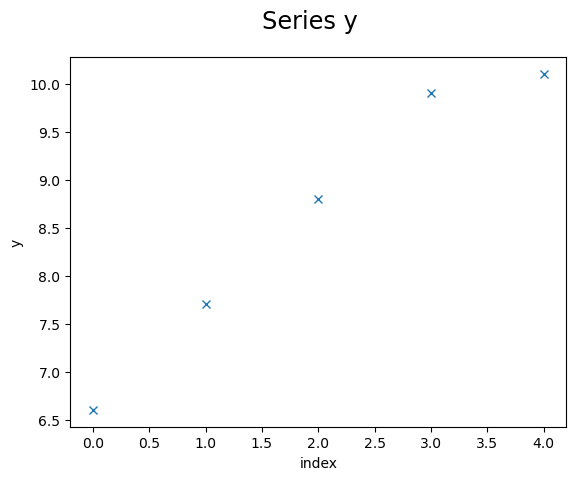

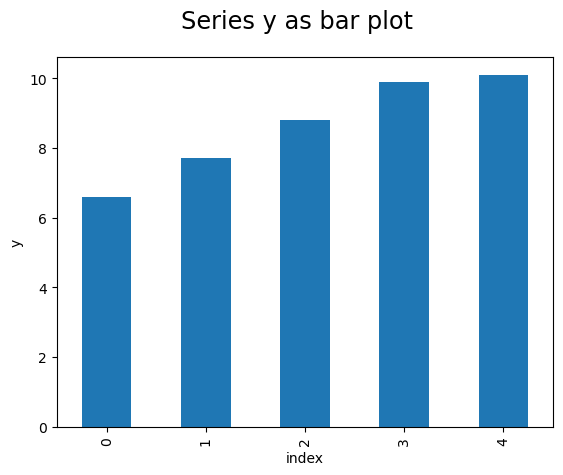

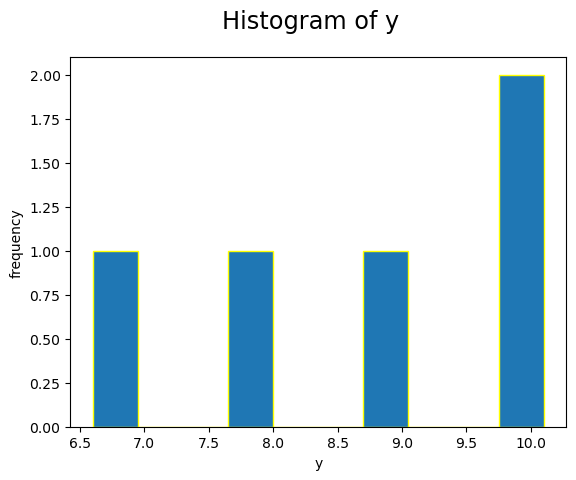

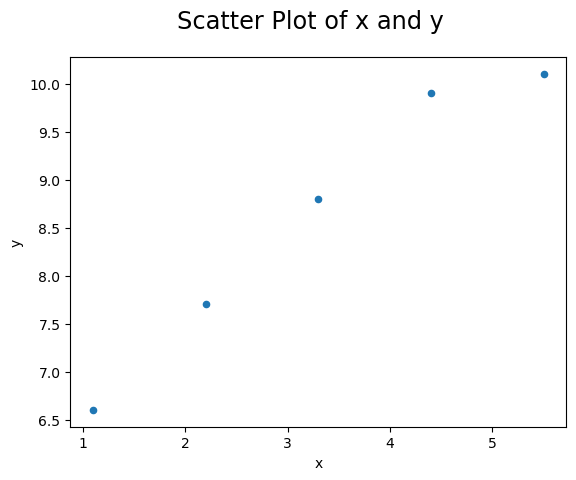

In [30]:
df['Measurement 1']['y'].plot(linestyle='', marker='x')
plt.suptitle('Series y', size='xx-large')
plt.xlabel('index')
plt.ylabel('y')
plt.show()

df['Measurement 1']['y'].plot.bar()
plt.suptitle('Series y as bar plot', size='xx-large')
plt.xlabel('index')
plt.ylabel('y')
plt.show()

df['Measurement 1']['y'].plot.hist(edgecolor='yellow')
plt.suptitle('Histogram of y', size='xx-large')
plt.xlabel('y')
plt.ylabel('frequency')
plt.show()


df['Measurement 1'].plot.scatter(x='x', y='y')
plt.suptitle('Scatter Plot of x and y', size='xx-large')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 3. Filtering data in *pandas*
---

So far the main focus of *pandas* *DataFrames* was as a data storage from which
data can be extracted in a very flexible way.
It is now time to discuss some of the most
common operations when trying to understand, clean and select data. This is done very
efficiently, because *pandas*, like *numpy* *arrays*, supports boolean or masked indexing.
If an array of boolean values containing only "True" or "False" is passed as the index, 
only rows with True-values are kept. Using the selection critera described above on
the column indices and generating such boolean filter masks, thus allows one to efficiently
select data for the final analysis by applying the logical AND of such criterea as a filter
mask. 

As an example, we may wish to exclude data at the lower border of the measurement range 
from the above data sets, thus all data should fulfill the condition `x > 0.15` A logical mask is 
efficiently generated by the vectorized operation
```
mask = (df['Measurement 1', x'] > 0.15) | (df['Measurement 2', 'x'] > 0.15)
```
Note that the logical operations *and* (`&`), *or* (`|`), *xor* (`^`) and *not* (`~`), and of
course less (`<`), less or equal (`<=`), greater (`>`) and greater or equal (`>=`) are 
supported in *pandas*. 

In [33]:
mask = (df['Measurement 1', 'x'] > 0.15) | (df['Measurement 2', 'x'] > 0.15)
df_selected1 = df[(mask)]
print(df_selected1)

  Measurement 1       Measurement 2       newtag
              x     y             x     y       
0           1.1   6.6          11.1  16.6   1.21
1           2.2   7.7          12.2  17.7   4.84
2           3.3   8.8          13.3  18.8  10.89
3           4.4   9.9          14.4  19.9  19.36
4           5.5  10.1          15.5  20.1  30.25


With a second mask, we could remove measurements with `x >= 0.85`.
```
mask2 = (df['Measurement 1', 'x'] < 0.85) | (df['Measurement 2', 'x'] < 0.85)
```
The logical *and* of these mask can then be used as a filter mask:
```
df_selected = df[(mask & mask2)]
```

In [34]:
mask2 = (df['Measurement 1', 'x'] < 0.85) | (df['Measurement 2', 'x'] < 0.85)

df_selected2 = df[(mask & mask2)]
print(df_selected2)

Empty DataFrame
Columns: [(Measurement 1, x), (Measurement 1, y), (Measurement 2, x), (Measurement 2, y), (newtag, )]
Index: []


Of course, we could have applied the filter in a single line of code:
```
df_sel = df[~( (df['Measurement 1', 'x'] <= 0.15) | 
               (df['Measurement 2', 'x'] <= 0.15) |
               (df['Measurement 1', 'x'] >= 0.85) |
               (df['Measurement 2', 'x'] >= 0.85) ) ]
display(df_sel)
```
Note: here we have used a slightly different logic, we first select the entries to be removed and then invert the selection.

In [35]:
df_sel = df[~( (df['Measurement 1', 'x'] <= 0.15) | 
               (df['Measurement 2', 'x'] <= 0.15) |
               (df['Measurement 1', 'x'] >= 0.85) |
               (df['Measurement 2', 'x'] >= 0.85) ) ]
display(df_sel)



Empty DataFrame
Columns: [(Measurement 1, x), (Measurement 1, y), (Measurement 2, x), (Measurement 2, y), (newtag, )]
Index: []

As seen in this simple example, very complex and powerful
filter criterea can be efficiently applied to data with *pandas* *DataFrames*.


### 4 Filtering and manipulating data in *pandas* using `.pipe` method
---

Often a situation may arise in which the application of a single filter is not sufficient. The applied filters, however, will reduce the size of the data set, whereby further filtering or calculation of specific values can be sped up. To take advantage of this, and the ability to quickly and easily view the effects of the filters on the dataset keeping a simple, non nested structure, the `.pipe` method can be used as a possible alternative, which creates a procedure flow of all application steps. For this purpose, functions are required that take a *pandas* *DataFrame* as the first argument and return a (modified) *pandas* *DataFrame*.

As an example, consider a procedure that includes the simple four steps:
  * Filtering the data according to the x value
  * Filtering the data according to the ratio Dy/y
  * Calculating a value f(x, y)
  * Filtering of specific f(x, y) values
  
For the selection of an x value, wrapping the existing code from above into a function that returns the reduced *pandas* *DataFrame* is sufficient:
```
def select_x_value(df, lower_value = 0.15, upper_value = 0.85):
    return df[~( (df['Measurement 1', 'x'] <= lower_value) | 
                 (df['Measurement 2', 'x'] <= lower_value) |
                 (df['Measurement 1', 'x'] >= upper_value) |
                 (df['Measurement 2', 'x'] >= upper_value) )]
```

In [36]:
def select_x_value(df, lower_value = 0.15, upper_value = 0.85):
    return df[~( (df['Measurement 1', 'x'] <= lower_value) | 
                 (df['Measurement 2', 'x'] <= lower_value) |
                 (df['Measurement 1', 'x'] >= upper_value) |
                 (df['Measurement 2', 'x'] >= upper_value) )]


The filter for Dy/y is shown here:
```
def select_y_value(df, threshold_value = 0.1):
    return df[((df["Measurement 1"]["Dy"] / df["Measurement 1"]["y"] < threshold_value) &
               (df["Measurement 2"]["Dy"] / df["Measurement 2"]["y"] < threshold_value))]
```

In [55]:
def select_y_value(df, threshold_value = 0.1):
    return df[((df["Measurement 1"]["Dy"] / df["Measurement 1"]["y"] < threshold_value) &
               (df["Measurement 2"]["Dy"] / df["Measurement 2"]["y"] < threshold_value))]


At the end, the function value f(x, y) is calculated on the (reduced) *pandas* *DataFrame* and a final filter 
criterion is applied:
```
def calculate_f_value(df):
    df.loc[:, ("Measurement 1", "f(x, y)")] = df["Measurement 1"]["x"] ** 2 + 2 * df["Measurement 1"]["y"]
    df.loc[:, ("Measurement 2", "f(x, y)")] = df["Measurement 2"]["x"] ** 2 + 2 * df["Measurement 2"]["y"]
    return df

def select_calculated_f_value(df, value=3.5):
    return df[((df["Measurement 1", "f(x, y)"] < calculated_value) & 
               (df["Measurement 2", "f(x, y)"] < calculated_value))]
```

In [44]:
def calculate_f_value(df):
    df.loc[:, ("Measurement 1", "f(x, y)")] = df["Measurement 1"]["x"] ** 2 + 2 * df["Measurement 1"]["y"]
    df.loc[:, ("Measurement 2", "f(x, y)")] = df["Measurement 2"]["x"] ** 2 + 2 * df["Measurement 2"]["y"]
    return df

def select_calculated_f_value(df, value=3.5):
    return df[((df["Measurement 1", "f(x, y)"] < calculated_value) & 
               (df["Measurement 2", "f(x, y)"] < calculated_value))]


In [45]:
print(df.columns)


MultiIndex([('Measurement 1', 'x'),
            ('Measurement 1', 'y'),
            ('Measurement 2', 'x'),
            ('Measurement 2', 'y'),
            (       'newtag',  '')],
           )


In [59]:
import pandas as pd
import numpy as np

# Sample DataFrame setup (assuming a MultiIndex structure with Measurement 1 and Measurement 2)
data = {
    ('Measurement 1', 'x'): np.random.rand(10),
    ('Measurement 1', 'y'): np.random.rand(10),
    ('Measurement 1', 'Dy'): np.random.rand(10) * 0.1,
    ('Measurement 2', 'x'): np.random.rand(10),
    ('Measurement 2', 'y'): np.random.rand(10),
    ('Measurement 2', 'Dy'): np.random.rand(10) * 0.1,
}
df = pd.DataFrame(data)

# Define the filter and calculation functions for the pipeline

def select_x_value(df, lower_value=0.15, upper_value=0.85):
    mask = ~(
        (df[('Measurement 1', 'x')] <= lower_value) |
        (df[('Measurement 2', 'x')] <= lower_value) |
        (df[('Measurement 1', 'x')] >= upper_value) |
        (df[('Measurement 2', 'x')] >= upper_value)
    )
    return df[mask]

def select_y_value(df, threshold_value=0.1):
    mask = (
        (df[('Measurement 1', 'Dy')] / df[('Measurement 1', 'y')] < threshold_value) &
        (df[('Measurement 2', 'Dy')] / df[('Measurement 2', 'y')] < threshold_value)
    )
    return df[mask]

def calculate_f_value(df):
    df = df.copy()  # Avoid SettingWithCopyWarning
    df[('Measurement 1', 'f(x, y)')] = df[('Measurement 1', 'x')] ** 2 + 2 * df[('Measurement 1', 'y')]
    df[('Measurement 2', 'f(x, y)')] = df[('Measurement 2', 'x')] ** 2 + 2 * df[('Measurement 2', 'y')]
    return df

def select_f_value(df, calculated_value=3.5):
    mask = (
        (df[('Measurement 1', 'f(x, y)')] < calculated_value) &
        (df[('Measurement 2', 'f(x, y)')] < calculated_value)
    )
    return df[mask]

# Apply the pipeline using .pipe
df_filtered = (df.pipe(select_x_value)
                  .pipe(select_y_value, threshold_value=0.05)  # Adjust the threshold as needed
                  .pipe(calculate_f_value)
                  .pipe(select_f_value, calculated_value=3.5))

# Display the final filtered DataFrame
print(df_filtered)


  Measurement 1                     Measurement 2                      \
              x         y        Dy             x         y        Dy   
6      0.660727  0.453474  0.016874      0.215179  0.761948  0.019465   

  Measurement 1 Measurement 2  
        f(x, y)       f(x, y)  
6      1.343508      1.570198  


The same procedure flow without using the `.pipe` method can have approximately the following structure,
where `x_value_mask`, `y_value_mask` and `f_value_mask` are boolean masks that accomplishes the same filter 
result as the mask combinations inside the `select_x_value`, `select_y_value`, `select_f_value` functions:
```
# let x_value_mask be a mask that is created on df
df_sel = df[x_value_mask]

# let y_value_mask be a mask that is created on df_sel
df_sel = df_sel[y_value_mask]

df_sel = calculate_value(df_sel)  
# or in a single step: calculate_value(df[x_value_mask & y_value_mask]), but both masks must be created on df!

# let f_value_mask be a mask that is created on df_sel after application of calculated_value
df_sel = df_sel[f_value_mask]
```

In summary, the `.pipe` method avoids the possibly messy `func2(func1(df[filter1])[filter2])` nesting 
that might otherwise be encountered in a complex analysis chain.  Which of the methods, boolean filter
masks or the `.pipe` method, is eventually applied depends on the user's choice.

In [57]:
import pandas as pd
import numpy as np

# Sample DataFrame setup (assuming a MultiIndex structure with Measurement 1 and Measurement 2)
data = {
    ('Measurement 1', 'x'): np.random.rand(10),
    ('Measurement 1', 'y'): np.random.rand(10),
    ('Measurement 1', 'Dy'): np.random.rand(10) * 0.1,
    ('Measurement 2', 'x'): np.random.rand(10),
    ('Measurement 2', 'y'): np.random.rand(10),
    ('Measurement 2', 'Dy'): np.random.rand(10) * 0.1,
}
df = pd.DataFrame(data)

# Step 1: Create the x_value_mask based on a range of x values
lower_value, upper_value = 0.15, 0.85
x_value_mask = ~(
    (df[('Measurement 1', 'x')] <= lower_value) |
    (df[('Measurement 2', 'x')] <= lower_value) |
    (df[('Measurement 1', 'x')] >= upper_value) |
    (df[('Measurement 2', 'x')] >= upper_value)
)

# Apply the x_value_mask
df_sel = df[x_value_mask]

# Step 2: Create the y_value_mask based on the Dy/y ratio
threshold_value = 0.1
y_value_mask = (
    (df_sel[('Measurement 1', 'Dy')] / df_sel[('Measurement 1', 'y')] < threshold_value) &
    (df_sel[('Measurement 2', 'Dy')] / df_sel[('Measurement 2', 'y')] < threshold_value)
)

# Apply the y_value_mask
df_sel = df_sel[y_value_mask]

# Step 3: Calculate a new column f(x, y) in the filtered DataFrame
def calculate_value(df):
    df.loc[:, ('Measurement 1', 'f(x, y)')] = df[('Measurement 1', 'x')] ** 2 + 2 * df[('Measurement 1', 'y')]
    df.loc[:, ('Measurement 2', 'f(x, y)')] = df[('Measurement 2', 'x')] ** 2 + 2 * df[('Measurement 2', 'y')]
    return df

df_sel = calculate_value(df_sel)

# Step 4: Create the f_value_mask based on a condition on f(x, y)
calculated_value = 3.5
f_value_mask = (
    (df_sel[('Measurement 1', 'f(x, y)')] < calculated_value) &
    (df_sel[('Measurement 2', 'f(x, y)')] < calculated_value)
)

# Apply the f_value_mask
df_sel = df_sel[f_value_mask]

# Final filtered DataFrame
print(df_sel)


Empty DataFrame
Columns: [(Measurement 1, x), (Measurement 1, y), (Measurement 1, Dy), (Measurement 2, x), (Measurement 2, y), (Measurement 2, Dy), (Measurement 1, f(x, y)), (Measurement 2, f(x, y))]
Index: []
